# Data preparation and preprocessing

data source ---> https://ofai.github.io/million-post-corpus/

## Load data

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np

# read in the csv file via pandas
# we don't separate on the semicolon, since there are several more within the article texts
df = pd.read_csv("data/articles.csv", names=["raw_data"], sep='delimiter', encoding='utf-8', engine="python")

# first look at data
df.head(3)

,raw_data
0,Etat;Die ARD-Tochter Degeto hat sich verpflich...
1,Etat;App sei nicht so angenommen worden wie ge...
2,Etat;'Zum Welttag der Suizidprävention ist es ...


In [2]:
# we need to separate the topic from the actual article text
# so we split on the first occurence of the semicolon
split_data = df['raw_data'].str.split(';', 1).str

# now we create two columns from the split data, one for the the topic and one for the actual text
df["topic"] = split_data[0]
df["raw_text"] = split_data[1]

# we don't need the raw data anymore
df.drop('raw_data', axis=1, inplace=True)

df.head(3)

,topic,raw_text
0,Etat,"Die ARD-Tochter Degeto hat sich verpflichtet, ..."
1,Etat,App sei nicht so angenommen worden wie geplant...
2,Etat,"'Zum Welttag der Suizidprävention ist es Zeit,..."


## Preprocess text

In [3]:
# create a new column with all transformations, keep the old text for comparison later on
df["processed_text"] = df["raw_text"].copy()

df.head(3)

,topic,raw_text,processed_text
0,Etat,"Die ARD-Tochter Degeto hat sich verpflichtet, ...","Die ARD-Tochter Degeto hat sich verpflichtet, ..."
1,Etat,App sei nicht so angenommen worden wie geplant...,App sei nicht so angenommen worden wie geplant...
2,Etat,"'Zum Welttag der Suizidprävention ist es Zeit,...","'Zum Welttag der Suizidprävention ist es Zeit,..."


##### Necessary steps:

1. drop NA values
2. drop duplicate articles
3. lowercase all text
4. remove digits or any word containing digits
5. remove punctuation
6. remove whitespace
7. use spaCy for stop words removal & lemmatizing
8. tackle german-specific "Umlaute" (ä,Ö,ß, etc.)


### Drop NAs

In [4]:
# take a look at the shape
print(df.shape)

# are there any NA values?
print(df.isnull().sum())

(10273, 3)
topic             0
raw_text          0
processed_text    0
dtype: int64


### Drop duplicates

In [5]:
# take a look at the shape
print(df.shape)

# are there any duplicate articles?
duplicated_df = df[df.duplicated()]
print(len(duplicated_df))

# there is one duplicate, so let's drop it
df = df.drop_duplicates()
print(df.shape)

(10273, 3)
1
(10272, 3)


### Lowercase

In [6]:
# lowercase every entry in the article column
df['processed_text']=df['processed_text'].apply(lambda x: x.lower())

df.processed_text[0]

'die ard-tochter degeto hat sich verpflichtet, ab august einer quotenregelung zu folgen, die für die gleichstellung von regisseurinnen sorgen soll. in mindestens 20 prozent der filme, die die ard-tochter degeto produziert oder mitfinanziert, sollen ab mitte august frauen regie führen. degeto-chefin christine strobl folgt mit dieser selbstverpflichtung der forderung von pro quote regie. die vereinigung von regisseurinnen hatte im vergangenen jahr eine quotenregelung gefordert, um den weiblichen filmschaffenden mehr gehör und ökonomische gleichstellung zu verschaffen. pro quote regie kritisiert, dass, während rund 50 prozent der regie-studierenden weiblich seien, der anteil der regisseurinnen bei fernsehfilmen nur bei 13 bis 15 prozent liege. in österreich sieht die situation ähnlich aus, auch hier wird von unterschiedlichen seiten handlungsbedarf angemahnt. aber wie soll dieser aussehen? ist die einführung der quotenregelung auch für die österreichische film- und fernsehlandschaft sinnv

### Remove digits of any kind

In [7]:
# lowercase every entry in the article column

# import RegEx to do this
import re
df['processed_text']=df['processed_text'].apply(lambda x: re.sub('\w*\d\w*','', x))

df.processed_text[0]

'die ard-tochter degeto hat sich verpflichtet, ab august einer quotenregelung zu folgen, die für die gleichstellung von regisseurinnen sorgen soll. in mindestens  prozent der filme, die die ard-tochter degeto produziert oder mitfinanziert, sollen ab mitte august frauen regie führen. degeto-chefin christine strobl folgt mit dieser selbstverpflichtung der forderung von pro quote regie. die vereinigung von regisseurinnen hatte im vergangenen jahr eine quotenregelung gefordert, um den weiblichen filmschaffenden mehr gehör und ökonomische gleichstellung zu verschaffen. pro quote regie kritisiert, dass, während rund  prozent der regie-studierenden weiblich seien, der anteil der regisseurinnen bei fernsehfilmen nur bei  bis  prozent liege. in österreich sieht die situation ähnlich aus, auch hier wird von unterschiedlichen seiten handlungsbedarf angemahnt. aber wie soll dieser aussehen? ist die einführung der quotenregelung auch für die österreichische film- und fernsehlandschaft sinnvoll? dis

### Remove punctuation

In [8]:
# import necessary library
import string

# first look at what special characters will be removed with the string.punctuation function
print(string.punctuation)

# now create custom punctuation removal, without the "-"
custom_punctuation = string.punctuation
custom_punctuation = custom_punctuation.replace("-","")

# apply to dataframe
df['processed_text']=df['processed_text'].apply(lambda x: re.sub('[%s]' % re.escape(custom_punctuation), '', x))

df.processed_text[0]

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


'die ard-tochter degeto hat sich verpflichtet ab august einer quotenregelung zu folgen die für die gleichstellung von regisseurinnen sorgen soll in mindestens  prozent der filme die die ard-tochter degeto produziert oder mitfinanziert sollen ab mitte august frauen regie führen degeto-chefin christine strobl folgt mit dieser selbstverpflichtung der forderung von pro quote regie die vereinigung von regisseurinnen hatte im vergangenen jahr eine quotenregelung gefordert um den weiblichen filmschaffenden mehr gehör und ökonomische gleichstellung zu verschaffen pro quote regie kritisiert dass während rund  prozent der regie-studierenden weiblich seien der anteil der regisseurinnen bei fernsehfilmen nur bei  bis  prozent liege in österreich sieht die situation ähnlich aus auch hier wird von unterschiedlichen seiten handlungsbedarf angemahnt aber wie soll dieser aussehen ist die einführung der quotenregelung auch für die österreichische film- und fernsehlandschaft sinnvoll diskutieren sie im f

### Remove whitespace

In [9]:
df['processed_text']=df['processed_text'].apply(lambda x: re.sub(' +',' ',x))

df.processed_text[0]

'die ard-tochter degeto hat sich verpflichtet ab august einer quotenregelung zu folgen die für die gleichstellung von regisseurinnen sorgen soll in mindestens prozent der filme die die ard-tochter degeto produziert oder mitfinanziert sollen ab mitte august frauen regie führen degeto-chefin christine strobl folgt mit dieser selbstverpflichtung der forderung von pro quote regie die vereinigung von regisseurinnen hatte im vergangenen jahr eine quotenregelung gefordert um den weiblichen filmschaffenden mehr gehör und ökonomische gleichstellung zu verschaffen pro quote regie kritisiert dass während rund prozent der regie-studierenden weiblich seien der anteil der regisseurinnen bei fernsehfilmen nur bei bis prozent liege in österreich sieht die situation ähnlich aus auch hier wird von unterschiedlichen seiten handlungsbedarf angemahnt aber wie soll dieser aussehen ist die einführung der quotenregelung auch für die österreichische film- und fernsehlandschaft sinnvoll diskutieren sie im forum

### Apply spaCy

In [10]:
# import and load necessary modules
import spacy
nlp = spacy.load('de_core_news_lg', disable=['parser', 'ner'])

In [11]:
# convert the pandas column of article texts to a list in order to pass it to spaCy
article_texts = df['processed_text'].tolist()

# apply spaCy on article texts via "nlp"-function
docs = list(nlp.pipe(article_texts))

In [12]:
# now we have all article texts available as a spaCy doc-object, which means we can apply several functions on the text
print(type(docs[0]))
print(len(docs))

<class 'spacy.tokens.doc.Doc'>
10272


In [13]:
# investigate for first article the first 10 tokens, if stopwords worked accordingly
count=0
for token in docs[0]:
    if count <= 10:
        print(token.text, "---", token.is_stop)
        count += 1

die --- True
ard-tochter --- False
degeto --- False
hat --- True
sich --- True
verpflichtet --- False
ab --- True
august --- False
einer --- True
quotenregelung --- False
zu --- True


In [14]:
# investigate for first article the first 10 tokens, if lemmatizing worked accordingly
count=0
for token in docs[0]:
    if count <= 10:
        print(token.text, "---", token.lemma_)
        count += 1

die --- der
ard-tochter --- ard-tochter
degeto --- degeto
hat --- haben
sich --- sich
verpflichtet --- verpflichten
ab --- ab
august --- august
einer --- einer
quotenregelung --- quotenregelung
zu --- zu


#### Remove stop words and lemmatize tokens

In [15]:
# in order to 1. filter out stop words and 2. replace words with their lemmas we need to iterate through two loops:

# Loop 1
# we need to iterate through every article in our doc-object

# Loop 2a
# while in every specific article, we need to iterate through every token in order to check if it is a stop word
# and to replace it with its lemma

# Loop 2b
# if it is not a stop word, we'll replace the token with its lemma and append it to a list of preprocessed tokens

# Loop 2c
# then we'll join the preprocessed tokens back into a whole article

# Finally we append the preprocessed articles to a respective "preprocessed_articles"-list

preprocessed_articles = []

for article in docs:
    preprocessed_tokens = []
    
    for token in article:
        
        if token.is_stop==False:
                     
            token = token.lemma_
            preprocessed_tokens.append(token)
            preprocessed_tokens_joined = ' '.join(preprocessed_tokens)
            
            
    preprocessed_articles.append(preprocessed_tokens_joined)

In [16]:
# compare old and new text
print('\033[1m', 'Old text', '\033[0m')
print(df['processed_text'][0])
print("------------------------------")
print('\033[1m', 'New text', '\033[0m')
print(preprocessed_articles[0])

 Old text 
die ard-tochter degeto hat sich verpflichtet ab august einer quotenregelung zu folgen die für die gleichstellung von regisseurinnen sorgen soll in mindestens prozent der filme die die ard-tochter degeto produziert oder mitfinanziert sollen ab mitte august frauen regie führen degeto-chefin christine strobl folgt mit dieser selbstverpflichtung der forderung von pro quote regie die vereinigung von regisseurinnen hatte im vergangenen jahr eine quotenregelung gefordert um den weiblichen filmschaffenden mehr gehör und ökonomische gleichstellung zu verschaffen pro quote regie kritisiert dass während rund prozent der regie-studierenden weiblich seien der anteil der regisseurinnen bei fernsehfilmen nur bei bis prozent liege in österreich sieht die situation ähnlich aus auch hier wird von unterschiedlichen seiten handlungsbedarf angemahnt aber wie soll dieser aussehen ist die einführung der quotenregelung auch für die österreichische film- und fernsehlandschaft sinnvoll diskutieren si

#### Pass preprocessed articles back into pandas dataframe

In [17]:
df['processed_text'] = preprocessed_articles

df.head()

,topic,raw_text,processed_text
0,Etat,"Die ARD-Tochter Degeto hat sich verpflichtet, ...",ard-tochter degeto verpflichten august quotenr...
1,Etat,App sei nicht so angenommen worden wie geplant...,app annehmen planen gering nutzung schelten sp...
2,Etat,"'Zum Welttag der Suizidprävention ist es Zeit,...",welttag suizidprävention alt dogma suizide sch...
3,Etat,Mitarbeiter überreichten Eigentümervertretern ...,mitarbeiter überreicht eigentümervertretern pe...
4,Etat,Service: Jobwechsel in der Kommunikationsbranc...,service jobwechsel kommunikationsbranche überb...


### German-specific task - handle Umlaute

In [18]:
# replace ä,ö,ß, etc. with ae, oe, ss, and so on
df["processed_text"] = df["processed_text"].str.replace('ä', 'ae')
df["processed_text"] = df["processed_text"].str.replace('Ä', 'Ae')
df["processed_text"] = df["processed_text"].str.replace('ö', 'oe')
df["processed_text"] = df["processed_text"].str.replace('Ö', 'Oe')
df["processed_text"] = df["processed_text"].str.replace('ü', 'ue')
df["processed_text"] = df["processed_text"].str.replace('Ü', 'Ue')
df["processed_text"] = df["processed_text"].str.replace('ß', 'ss')

df.processed_text[0]

'ard-tochter degeto verpflichten august quotenregelung folgen gleichstellung regisseurinnen sorgen mindestens prozent filme ard-tochter degeto produzieren mitfinanziert mitte august frauen regie fahren degeto-chefin christine strobl folgen selbstverpflichtung forderung pro quote regie vereinigung regisseurinnen quotenregelung fordern weiblich filmschaffenden gehoer oekonomisch gleichstellung verschaffen pro quote regie kritisieren prozent regie-studierenden weiblich anteil regisseurinnen fernsehfilmen prozent liegen oesterreich sehen situation aehnlich unterschiedlich seiten handlungsbedarf anmahnen aussehen einfuehrung quotenregelung oesterreichisch film- fernsehlandschaft sinnvoll diskutieren forum'

## Save data to csv-file

In [19]:
df.to_csv('data/articles_preprocessed.csv', index=False, header=True)

# Short Exploratory data analysis

In [20]:
df = pd.read_csv("data/articles_preprocessed.csv")

article_texts = df['processed_text'].tolist()

# apply spaCy on article texts via "nlp"-function
docs = list(nlp.pipe(article_texts))

In [39]:
# matplotlib throws a lot DeprecationWarnings after update, so let's ignore them for now
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import matplotlib.pyplot as plt
import seaborn as sns

## General statistics

In [22]:
import statistics 

num_of_articles = df.shape[0]
print(f"Number of articles in corpus --- {num_of_articles}")

Number of articles in corpus --- 10272


In [23]:
# iterate through every token in every article and count all tokens = words

word_count_all_articles = []

for article in docs:
    
    words_article = []
    
    for token in article:
        words_article.append(token)
        num_words = len(words_article)
            
    word_count_all_articles.append(num_words)

average_words_per_article = round(statistics.mean(word_count_all_articles))
print(f"Average words per article in corpus --- {average_words_per_article}")

Average words per article in corpus --- 176


##### we also calculate a ratio of number of articles divided by average words per article for later on
##### with this ratio we can decide, what Deep Learning model approach we will choose, according to Google-Best-Practice!
##### a flowchart of this decision process can be found here:
--> https://developers.google.com/machine-learning/guides/text-classification/step-2-5

In [24]:
ratio = num_of_articles / average_words_per_article
print(round(ratio))

58


## Topic distribution

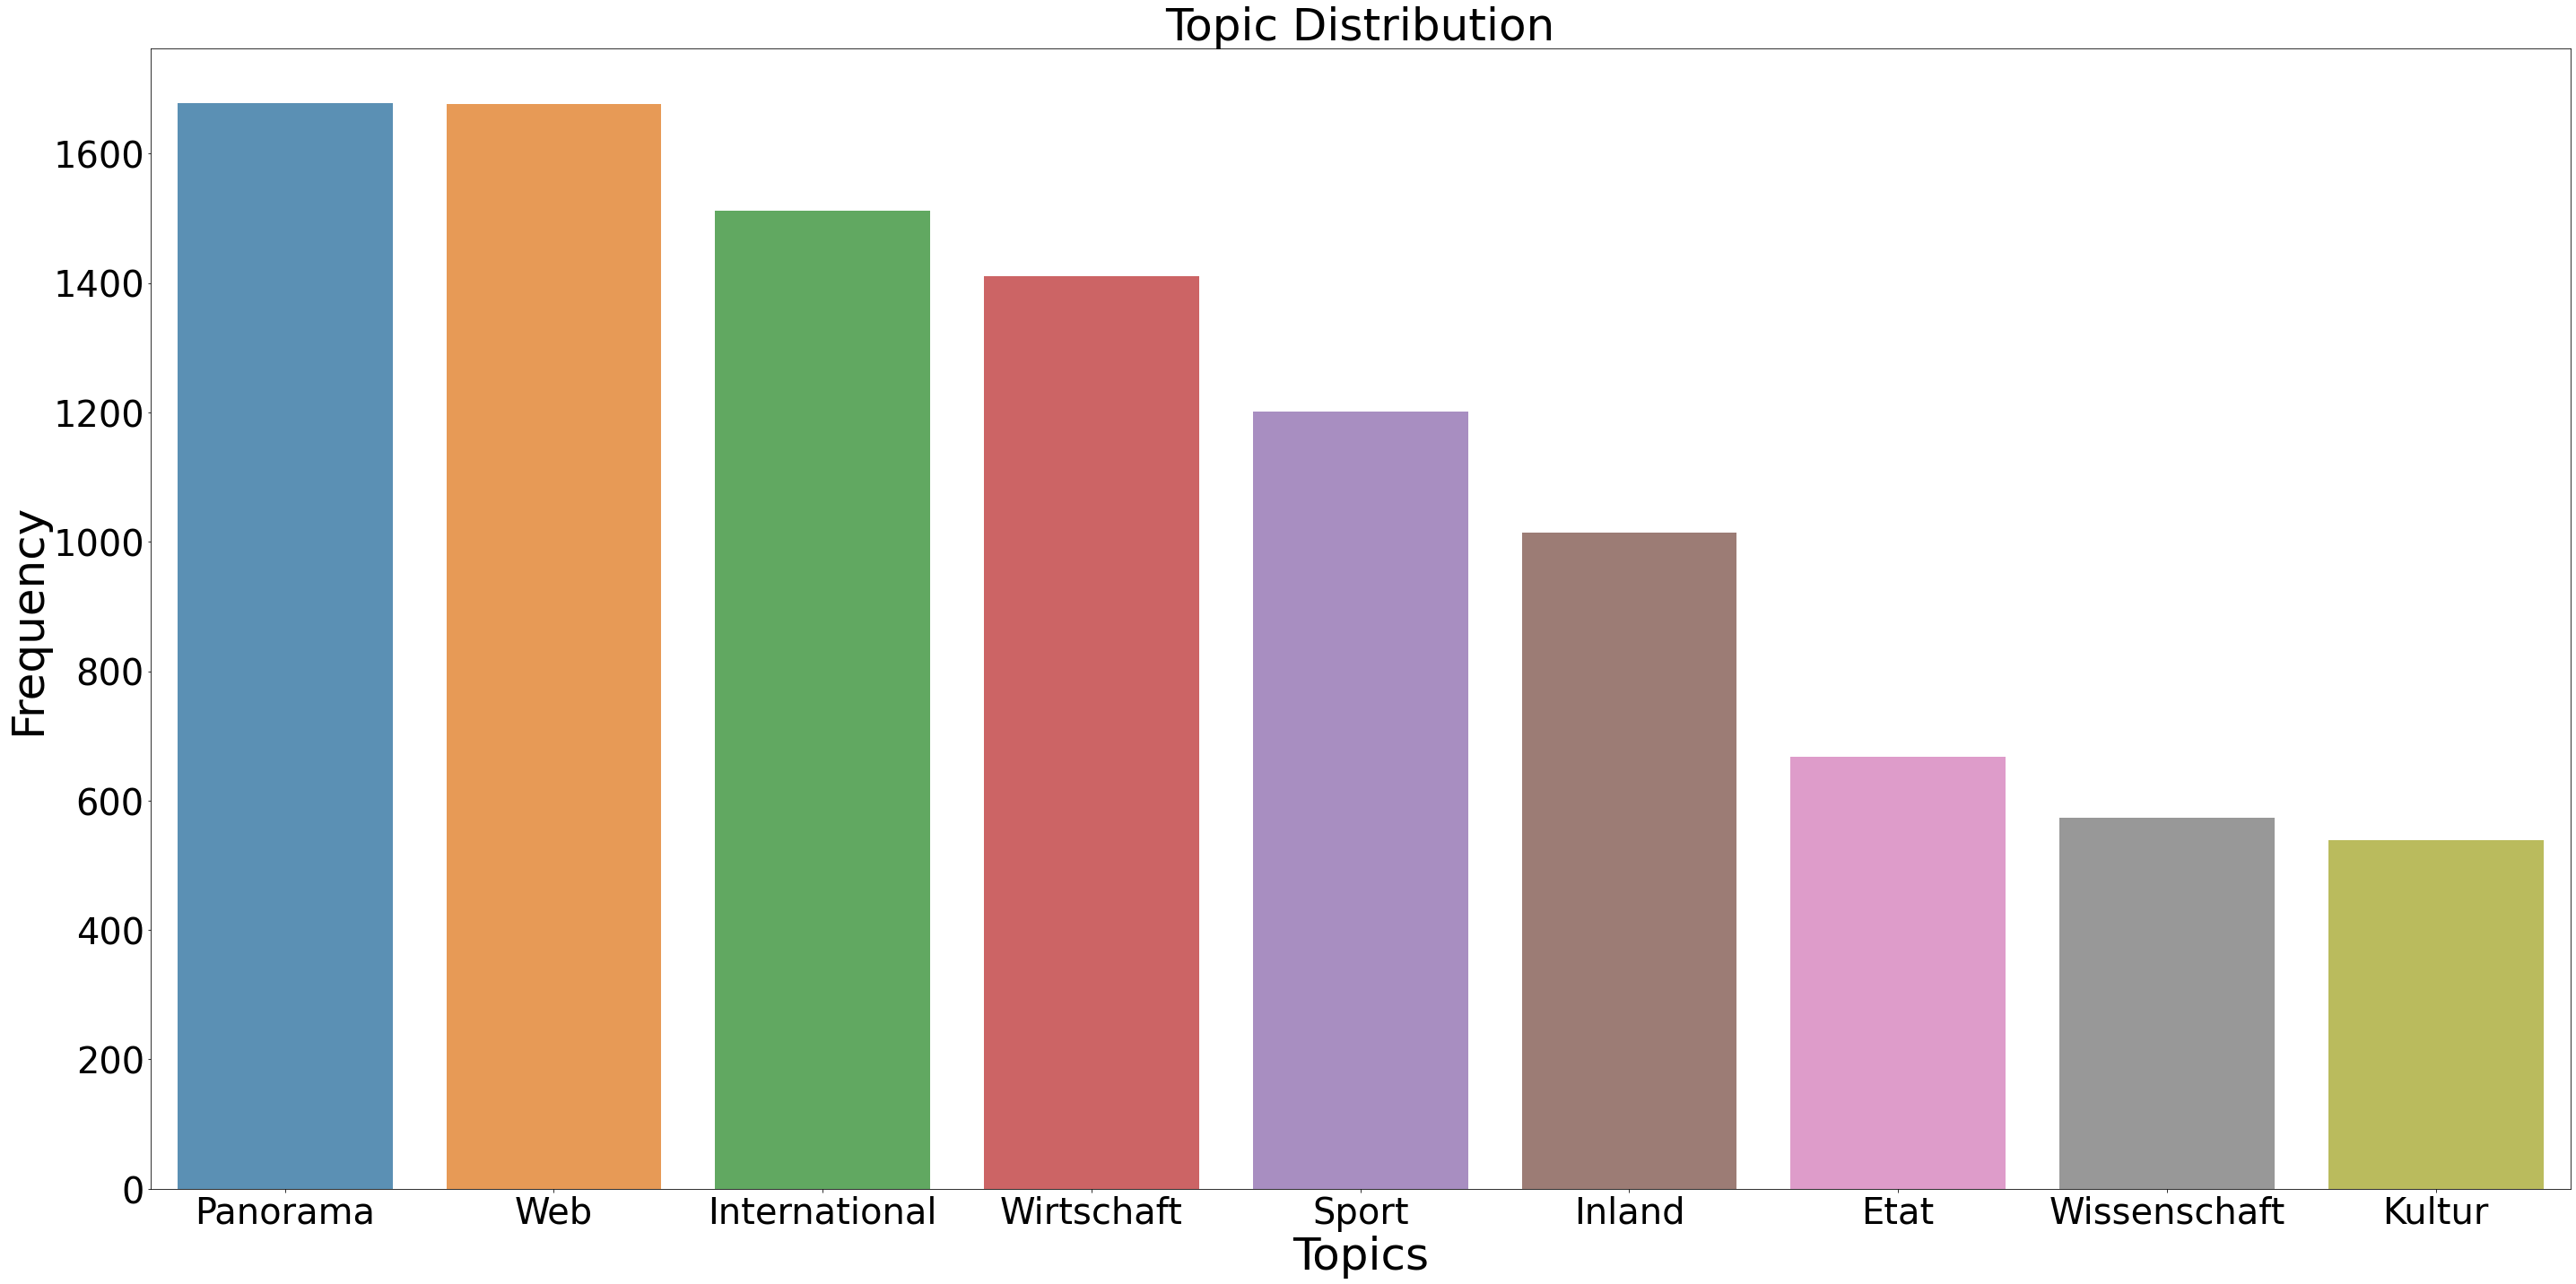

In [25]:
# Plot a frequency count of every topic in the dataset
x_rating = df.topic.value_counts()
y_rating = x_rating.sort_index()
plt.figure(figsize=(40,20))
sns.barplot(x_rating.index, x_rating.values, alpha=0.8)
plt.title("Topic Distribution", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Topics', fontsize=50)
plt.xticks(fontsize=40)
plt.tight_layout()

##### it seems that our labels are a bit imbalanced - science ("Wissenschaft") and culture ("Kultur") are somewhat underrepresented!

## Term frequency analysis

In [26]:
# create a dict of words and their frequencies in the corpus

word_frequencies = {}
for article in docs:
    
    for token in article:
        
        if token.text not in word_frequencies.keys():
            word_frequencies[token.text] = 1
        else:
            word_frequencies[token.text] += 1

In [27]:
unique_words = len(word_frequencies)
print (f"There are {unique_words} unique words in the corpus.")

There are 193811 unique words in the corpus.


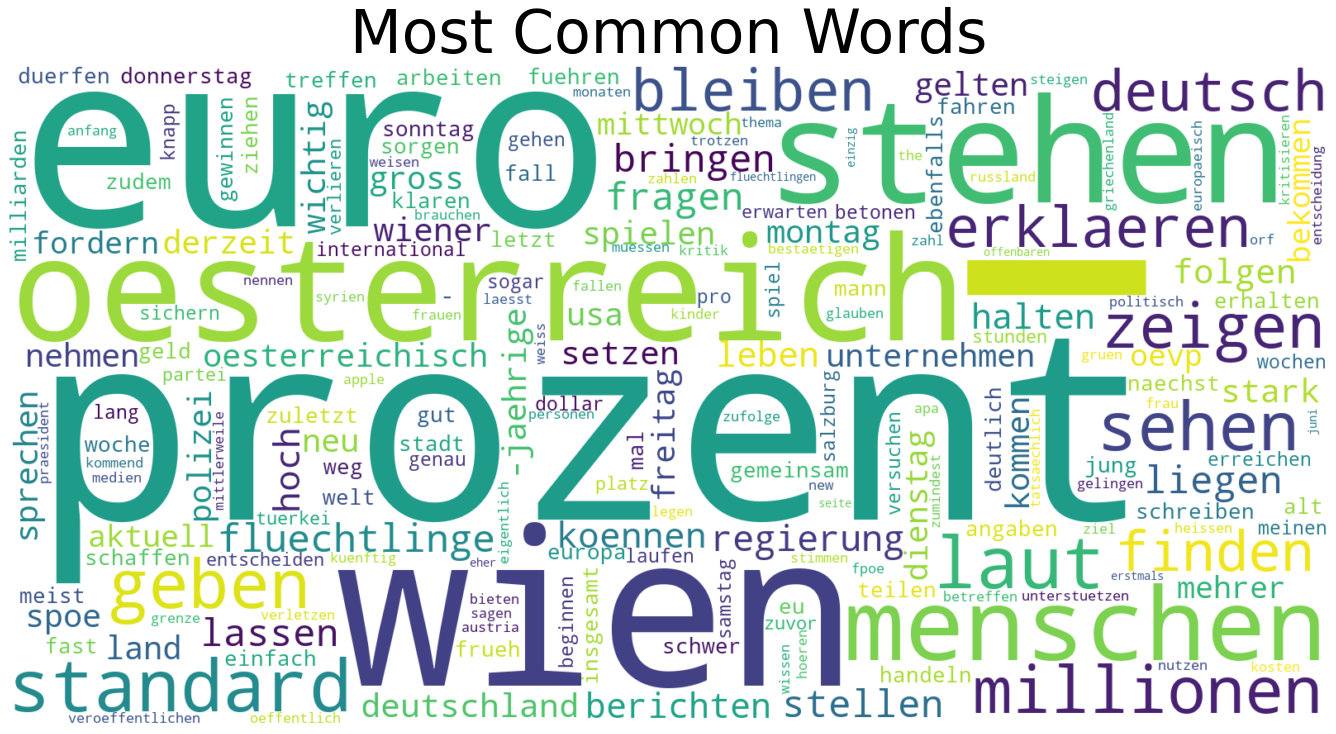

In [28]:
# use the word frequencies dict to illustrate the word frequencies in a word cloud
# the bigger the word the higher its frequency in the whole corpus

from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, background_color='white').generate_from_frequencies(word_frequencies)
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Most Common Words', fontsize=60)
plt.tight_layout(pad=0)

##### it gets quite obvious, that we use a corpus of Austrian articles!

# Predictive Modeling

## Setup

In [29]:
# import necessary libraries
import pandas as pd
import numpy as np

# read in the csv file via pandas
df = pd.read_csv("data/articles_preprocessed.csv")

# first look at data
df.head()

,topic,raw_text,processed_text
0,Etat,"Die ARD-Tochter Degeto hat sich verpflichtet, ...",ard-tochter degeto verpflichten august quotenr...
1,Etat,App sei nicht so angenommen worden wie geplant...,app annehmen planen gering nutzung schelten sp...
2,Etat,"'Zum Welttag der Suizidprävention ist es Zeit,...",welttag suizidpraevention alt dogma suizide sc...
3,Etat,Mitarbeiter überreichten Eigentümervertretern ...,mitarbeiter ueberreicht eigentuemervertretern ...
4,Etat,Service: Jobwechsel in der Kommunikationsbranc...,service jobwechsel kommunikationsbranche ueber...


## Train-test split

In [30]:
# first let's split the data into X and y and put away a test set
from sklearn.model_selection import train_test_split

X = df['processed_text']
y = df['topic']

# for reproducability we choose the random state "42"
# since the topics are imbalanced, we also stratify y so that we get the same proportion in the train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

## Classic algorithms

In [31]:
# import necessary libraries for all following tasks

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.pipeline import Pipeline

from sklearn import metrics

In [32]:
# we build a function, which fits the pipeline to the train data, makes predictions and print a classification report

def fit_predict(pipeline):
    
    pipeline.fit(X_train, y_train)

    predictions = pipeline.predict(X_test)

    print(metrics.classification_report(y_test,predictions))

In [33]:
# in order to transform the text into a vector-representation, we use tf-idf
# in order to predict the topic of an article, we use two often used classifiers -  Naive Bayes and Support Vector Machines

vectorizer = TfidfVectorizer()
nb = MultinomialNB()
svm = LinearSVC(max_iter = 1500, dual=False)


# 1 - Naive Bayes:
tfidf_clf_nb = Pipeline(
    
    [('bow', vectorizer),
     ('clf', nb),
])


# 2 - SVM:
tfidf_clf_svm = Pipeline(
    
    [('bow', vectorizer),
     ('clf', svm),
])

In [34]:
fit_predict(tfidf_clf_nb)

               precision    recall  f1-score   support

         Etat       1.00      0.07      0.13       220
       Inland       0.87      0.57      0.69       335
International       0.84      0.84      0.84       499
       Kultur       0.00      0.00      0.00       178
     Panorama       0.47      0.92      0.62       554
        Sport       0.98      0.91      0.95       396
          Web       0.67      0.91      0.77       553
   Wirtschaft       0.77      0.76      0.76       466
 Wissenschaft       1.00      0.02      0.03       189

     accuracy                           0.69      3390
    macro avg       0.73      0.56      0.53      3390
 weighted avg       0.74      0.69      0.65      3390



C:\Users\Fabian\Anaconda3\envs\nf\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Naive Bayes works better than flipping a coin (>0.5) in terms of accuracy, but failed to predict the culture topic!

In [35]:
fit_predict(tfidf_clf_svm)

               precision    recall  f1-score   support

         Etat       0.90      0.76      0.83       220
       Inland       0.81      0.81      0.81       335
International       0.88      0.87      0.87       499
       Kultur       0.83      0.88      0.86       178
     Panorama       0.80      0.82      0.81       554
        Sport       0.98      0.98      0.98       396
          Web       0.90      0.89      0.90       553
   Wirtschaft       0.81      0.83      0.82       466
 Wissenschaft       0.86      0.84      0.85       189

     accuracy                           0.86      3390
    macro avg       0.86      0.86      0.86      3390
 weighted avg       0.86      0.86      0.86      3390



##### The SVM works quite good overall, with an accuracy of 86%!

## Deep Learning

##### from the EDA-part, we know that our ratio (58) is < 1500, that's why we choose a Multi-Layer-Perceptron model (according to Google best pratice)

### MLP with LSTM

In [36]:
# import necessary libraries for all following tasks

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional

In [37]:
# We set the maximum vocabulary size and maximum length, so some articles will be padded or truncated
# We tokenize our train and test data and encode our topics into numeric values

vocab_size = 5000
max_length = 200


tokenizer = Tokenizer(num_words = vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')

validation_sequences = tokenizer.texts_to_sequences(X_test)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding='post', truncating='post')


label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(y)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(y_train))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(y_test))

In [40]:
# building a MLP keras model with a LSTM
embedding_dim = 64

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(embedding_dim)))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
dropout (Dropout)            (None, None, 64)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
Total params: 387,338
Trainable params: 387,338
Non-trainable params: 0
_________________________________________________________________


In [41]:
# define the optimizer and compile the model
# for multi-class classification, we use sparse_categorical_crossentropy!

optimizer = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy'],
)

In [42]:
# choose number of epochs

num_epochs = 20


history = model.fit(
    train_padded, 
    training_label_seq, 
    epochs=num_epochs, 
    validation_data=(validation_padded, validation_label_seq), 
    verbose=1, 
    batch_size=128)

Train on 6882 samples, validate on 3390 samples
Epoch 1/20
6882/6882 [==============================] - 40s 6ms/sample - loss: 2.1660 - accuracy: 0.1760 - val_loss: 2.0786 - val_accuracy: 0.2133
Epoch 2/20
6882/6882 [==============================] - 35s 5ms/sample - loss: 1.9107 - accuracy: 0.3230 - val_loss: 1.7421 - val_accuracy: 0.4487
Epoch 3/20
6882/6882 [==============================] - 36s 5ms/sample - loss: 1.5188 - accuracy: 0.4788 - val_loss: 1.3484 - val_accuracy: 0.5457
Epoch 4/20
6882/6882 [==============================] - 36s 5ms/sample - loss: 1.2060 - accuracy: 0.5867 - val_loss: 1.1998 - val_accuracy: 0.6086
Epoch 5/20
6882/6882 [==============================] - 38s 6ms/sample - loss: 1.0207 - accuracy: 0.6675 - val_loss: 1.1035 - val_accuracy: 0.6024
Epoch 6/20
6882/6882 [==============================] - 39s 6ms/sample - loss: 0.8077 - accuracy: 0.7307 - val_loss: 0.9883 - val_accuracy: 0.6658
Epoch 7/20
6882/6882 [==============================] - 38s 6ms/sample

##### we get an accuracy of nearly 97% on the train data
##### by looking at 75% accuracy on the test data, we notice that the model is overfitting!